Normalizing the PSD of a random input
---
Normalizing the PSD to obtain the same normalization provided by the matplotlib mlab function


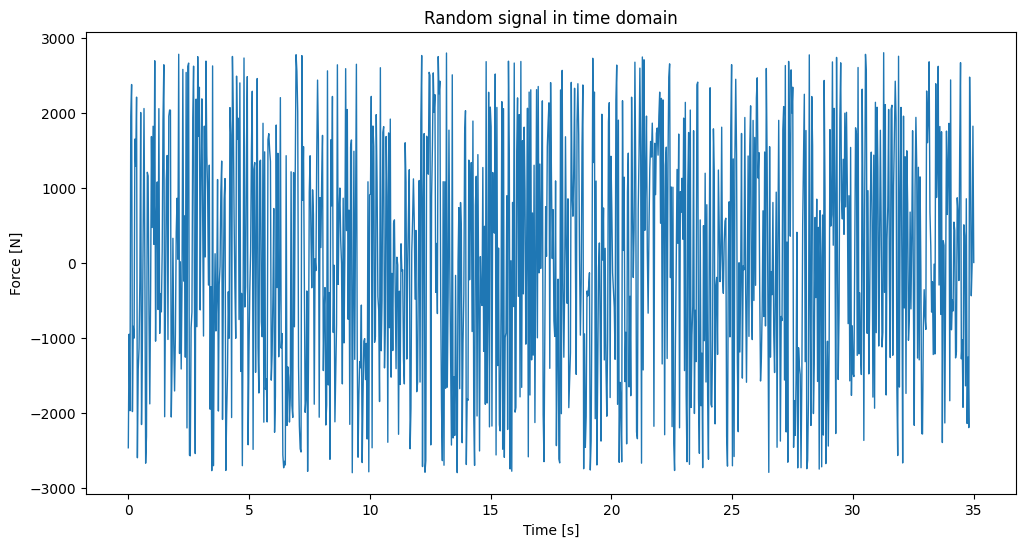

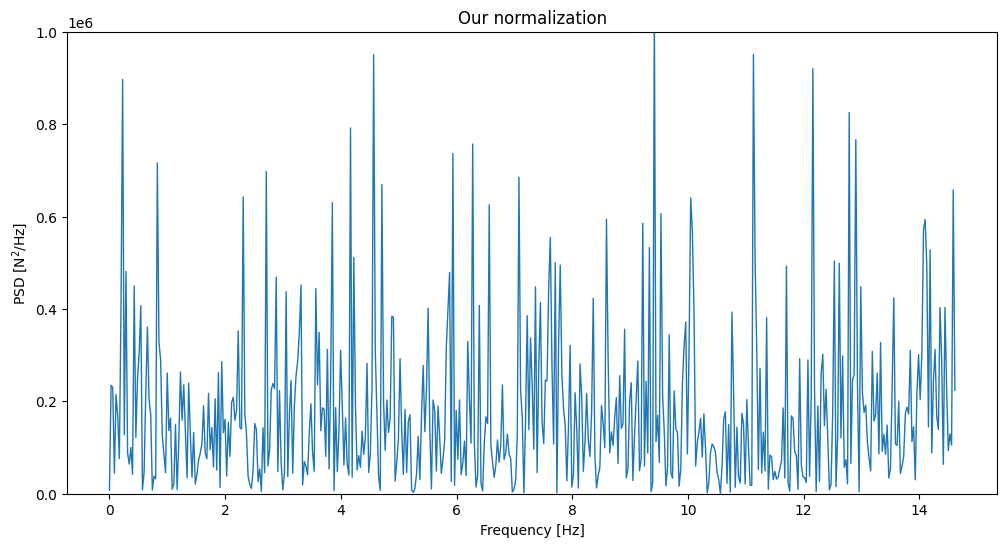

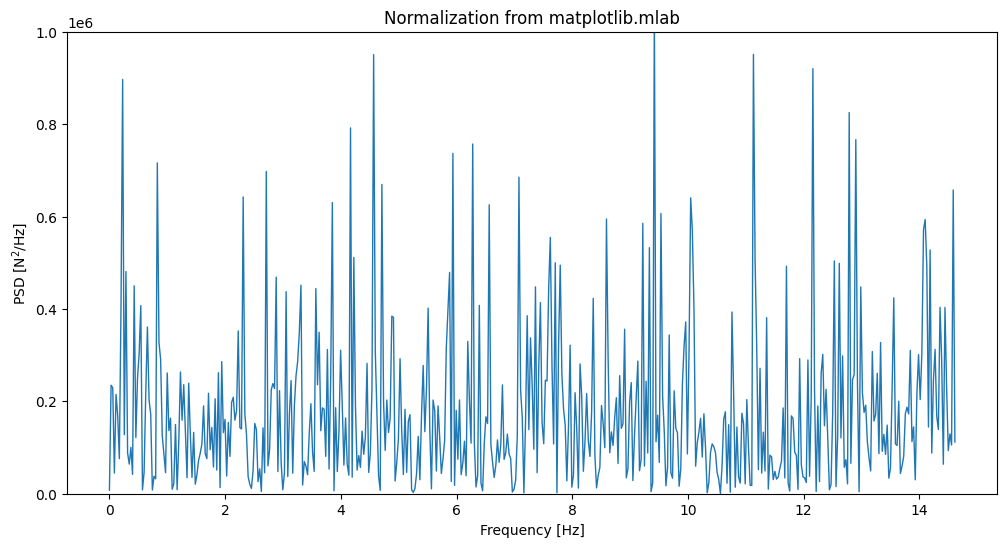

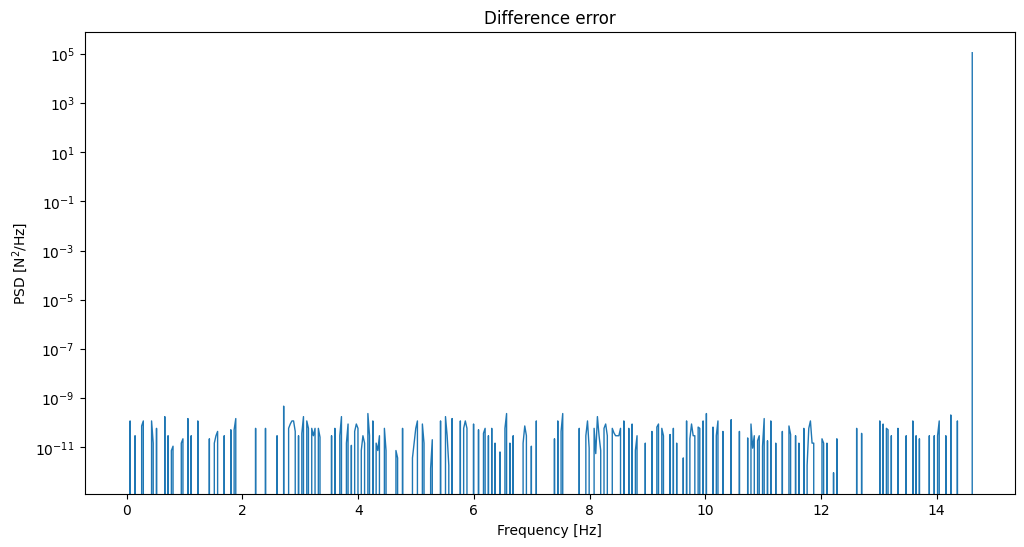

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rcParams['lines.linewidth'] = 1

tmax = 35
Ntime = 2**10
t = np.linspace(0, tmax, Ntime)
dt = t[1] - t[0]

ampl = 2800
x_t_init = ampl*(2*np.random.rand(Ntime) - 1)

plt.clf()
plt.plot(t, x_t_init)
plt.title('Random signal in time domain')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.show()

Fs = 1/dt
NFFT = Ntime

window = np.ones(Ntime)
#window = np.hamming(Ntime) # NOTE this is the recommended default by matplotlib.mlab
x_t = x_t_init * window

x_f = np.fft.rfft(x_t, n=Ntime) # [N]
freqs_Hz = np.fft.rfftfreq(Ntime, dt)
pxx = np.conj(x_f)*x_f # [N^2]

# Also include scaling factors for one-sided densities and dividing by
# the sampling frequency, if desired. Scale everything, except the DC
# component and the NFFT/2 component: 
slc = slice(1, None, None)
pxx[slc] *= 2
pxx /= Fs # [N^2 / Hz]
# Scale the spectrum by the norm of the window to compensate for
# windowing loss; see Bendat & Piersol -- Random Data: Analysis and Measurement Procedures, John Wiley & Sons (1986) Sec 11.5.2.
pxx /= (np.abs(window)**2).sum()

plt.plot(freqs_Hz, pxx.real)
plt.title('Our normalization')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [N$^2$/Hz]')
plt.ylim(0, 1e6)
plt.show()

# NOTE comparing with the well-known library from matplotlib.mlab
pxx_mlab, f = mlab.psd(x_t_init, NFFT=Ntime, Fs=Fs, detrend='none', scale_by_freq=True, sides='onesided', window=window)
plt.plot(freqs_Hz, pxx_mlab.real)
plt.title('Normalization from matplotlib.mlab')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [N$^2$/Hz]')
plt.ylim(0, 1e6)
plt.show()

plt.plot(freqs_Hz, (pxx-pxx_mlab).real)
plt.title('Difference error')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [N$^2$/Hz]')
plt.yscale('log')
plt.show()